z5527155

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


img1 = cv2.imread("img1.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("img2.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]

ratio1 = 500 / width1
new_height1 = int(ratio1 * height1)

ratio2 = 500 / width2
new_height2 = int(ratio2 * height2)

img1 = cv2.resize(img1, (500, new_height1))
img2 = cv2.resize(img2, (500, new_height2))

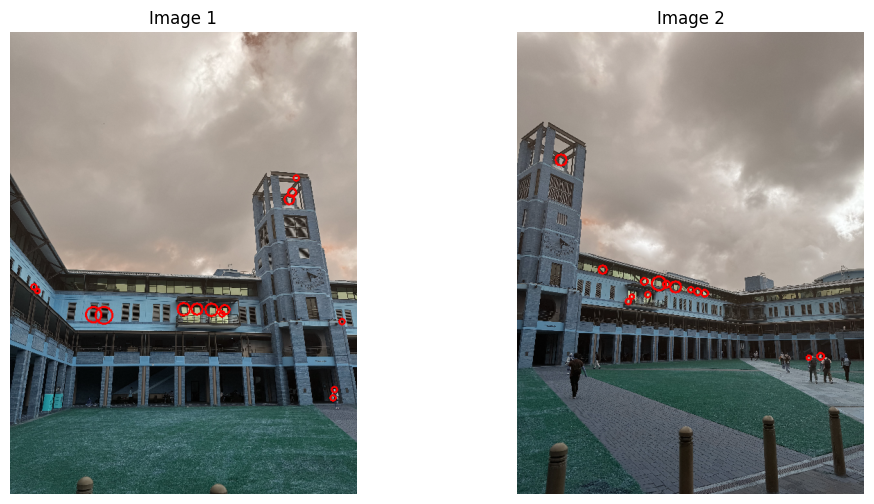

In [4]:
def draw_custom_keypoints(img, keypoints, color):
    image_with_keypoints = img.copy()
    for kp in keypoints:
        X, Y = int(kp.pt[0]), int(kp.pt[1])
        radius = int(kp.size * 2)
        cv2.circle(image_with_keypoints, (X, Y), radius, color, 2)
    
    return image_with_keypoints

sift = cv2.SIFT.create(nfeatures=20)

img1_keypoints, img1_descriptors = sift.detectAndCompute(img1, None)
img2_keypoints, img2_descriptors = sift.detectAndCompute(img2, None)

img1_sift = draw_custom_keypoints(img1, img1_keypoints, (0, 0, 255))
img2_sift = draw_custom_keypoints(img2, img2_keypoints, (0, 0, 255))

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Image 1")
plt.imshow(cv2.cvtColor(img1_sift, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Image 2")
plt.imshow(cv2.cvtColor(img2_sift, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()